In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from phase_space_reconstruction.virtual.beamlines import quadlet_tdc_bend
from phase_space_reconstruction.virtual.scans import run_3d_scan
from phase_space_reconstruction.diagnostics import ImageDiagnostic
from phase_space_reconstruction.visualization import plot_3d_scan_data
from phase_space_reconstruction.train import train_3d_scan

from bmadx.distgen_utils import create_beam
from bmadx.plot import plot_projections
from bmadx.constants import PI

In [2]:
# lattice and data directory
p0c = 43.4e6 # reference momentum in eV/c
lattice = quadlet_tdc_bend(p0c=p0c, dipole_on=False)
data_dir = os.path.join('data', 'yaml_files')

In [3]:
# create gaussian and nongaussian beams using Bmad-X distgen functionality
gaussian_beam = torch.load('test.pt')

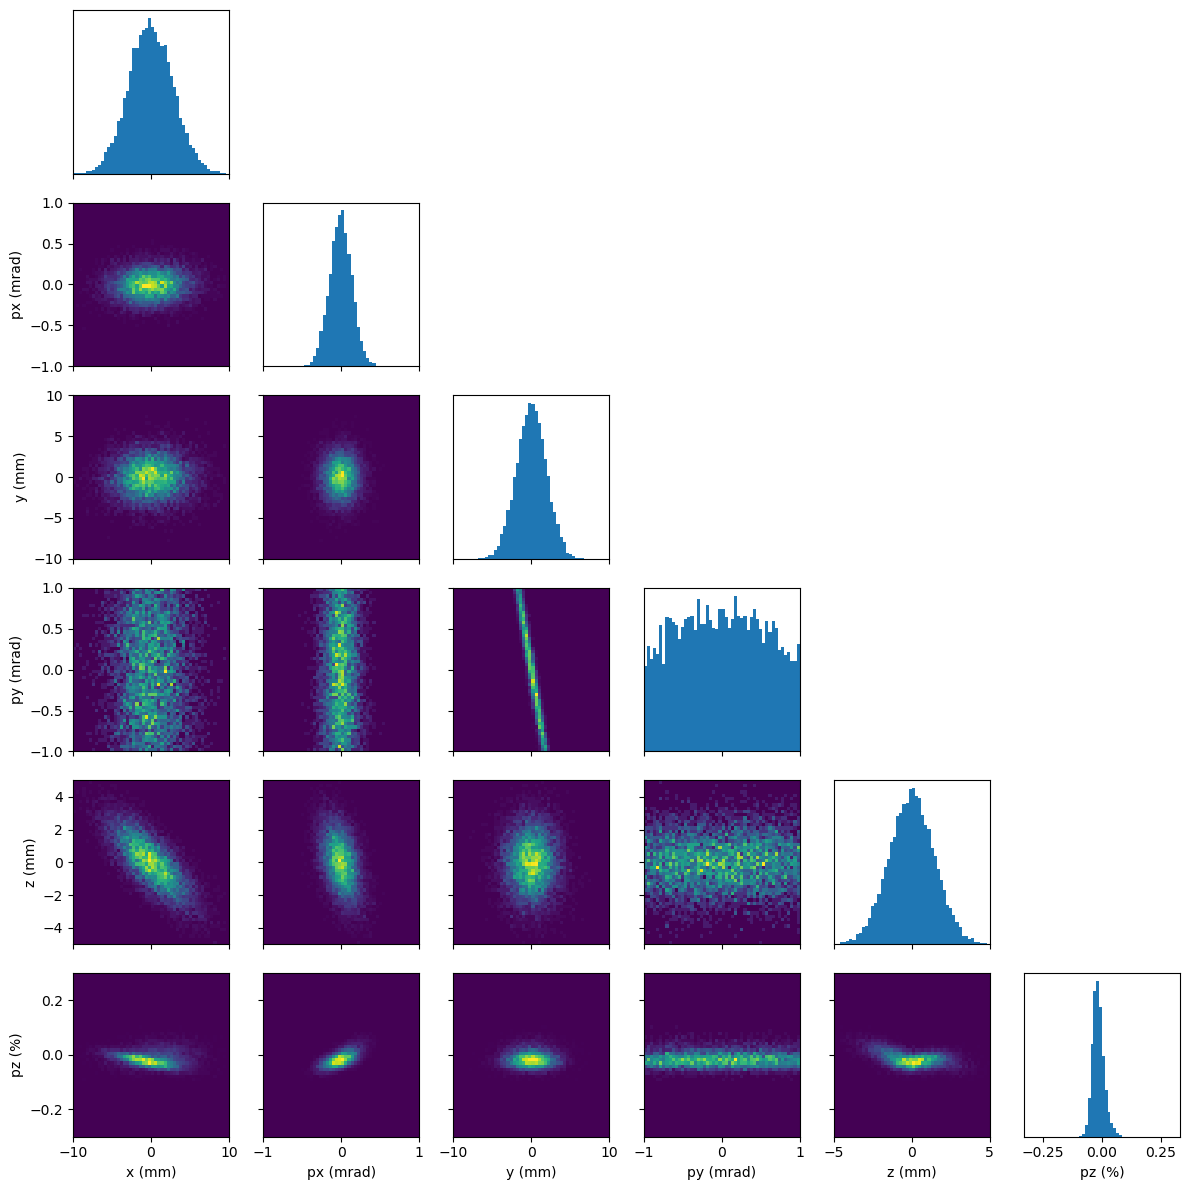

In [4]:
# plot linear and nonlinear beams
lims = np.array([[-10e-3, 10e-3],
                 [-1e-3, 1e-3],
                 [-10e-3, 10e-3],
                 [-1e-3, 1e-3],
                 [-5e-3, 5e-3],
                 [-3e-3, 3e-3]])
fig, ax = plot_projections(gaussian_beam.numpy_particles(), custom_lims=lims)
plt.show()

In [5]:
# use xopt for optimization
from triplet_opt import optimize_function, output
from xopt import VOCS

opt_vocs = VOCS(
        variables = {"k1":[0,20], "k2":[-20,0], "k3":[0,20]},
        objectives = {"total_size": "MINIMIZE"}
    )

opt_gaussian_beam = optimize_function(
    opt_vocs, output, n_iterations=100, 
    function_kwargs={
        'beam': gaussian_beam,
        'lattice': lattice
    }
)


/home/jp/mambaforge/envs/ps-reconstruction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# optimization results for linear beam
opt_gaussian_beam.data

,k1,k2,k3,std_x,std_y,total_size,xopt_runtime,xopt_error
1,17.698819,-19.449114,11.158709,0.020757,0.004791,0.021183,0.038492,False
2,2.351652,-4.947056,19.590346,0.007556,0.003081,0.008030,0.036648,False
3,1.457132,-11.367546,5.787922,0.004673,0.003384,0.005630,0.036936,False
4,0.000000,-6.289600,9.997243,0.000552,0.002877,0.002814,0.037194,False
5,0.852981,-2.684849,5.149857,0.000438,0.001801,0.001735,0.036919,False
...,...,...,...,...,...,...,...,...
99,15.926784,-9.205803,4.702700,0.018306,0.003799,0.018578,0.036832,False
100,16.017767,-15.643763,2.116599,0.027370,0.007915,0.028368,0.036911,False
101,0.654471,-15.122993,2.266193,0.011939,0.004737,0.012715,0.036805,False
102,15.368438,-19.134321,5.740888,0.023913,0.009126,0.025466,0.036820,False


In [7]:
opt_gaussian_beam.data.iloc[-1][["k1","k2", "k3"]]

k1    2.831605
k2   -2.395407
k3    1.350094
Name: 103, dtype: object